# Installing Dependencies

In [1]:
!pip3 install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118

Looking in indexes: https://download.pytorch.org/whl/cu118


In [3]:
!pip install easyocr
!pip install imutils

In [4]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import imutils
import easyocr

# Read in Image Grayscale and Blur

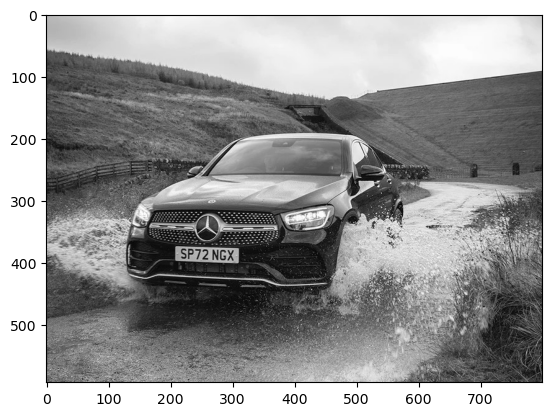

In [46]:
img = cv2.imread('image5.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))

# Apply Filter and Find Edges For Localization

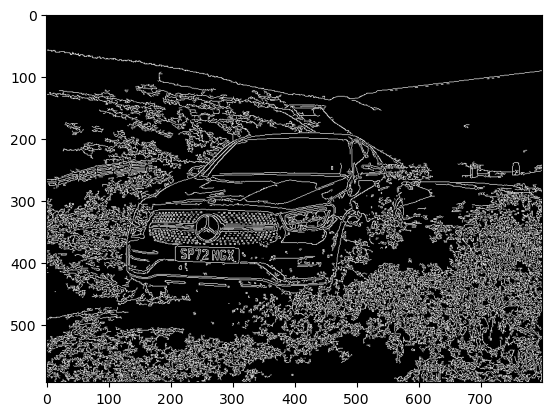

In [47]:
bfilter  = cv2.bilateralFilter(gray,11,17,17) # Noise Reduction
edged = cv2.Canny(bfilter,30,200) # Edge Detection
plt.imshow(cv2.cvtColor(edged,cv2.COLOR_BGR2RGB))

# Find Contours and Apply Mask

In [48]:
keypoints = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(keypoints)
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]

In [49]:
location = None
for contour in contours:
    approx = cv2.approxPolyDP(contour, 10, True)
    if len(approx) == 4:
        location = approx
        break

In [50]:
mask = np.zeros(gray.shape, np.uint8)
new_image = cv2.drawContours(mask, [location], 0,255, -1)
new_image = cv2.bitwise_and(img, img, mask=mask)

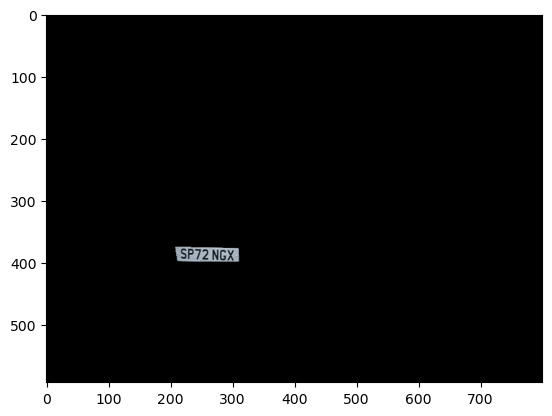

In [51]:
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))

In [52]:
(x,y) = np.where(mask==255)
(x1, y1) = (np.min(x), np.min(y))
(x2, y2) = (np.max(x), np.max(y))
cropped_image = gray[x1:x2+1, y1:y2+1]

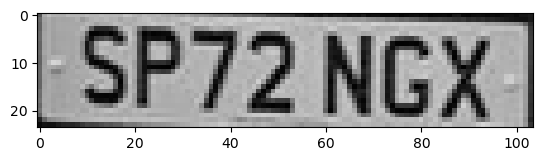

In [53]:
plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))

# Use Easy OCR To Read Text

In [54]:
reader = easyocr.Reader(['en'])
result = reader.readtext(cropped_image)
result

[([[4, 0], [100, 0], [100, 24], [4, 24]], 'SP72 NGX', 0.6082364861069777)]

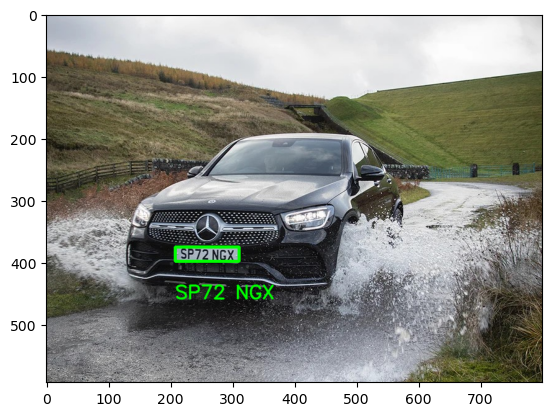

In [55]:
text = result[0][-2]
font = cv2.FONT_HERSHEY_SIMPLEX
res = cv2.putText(img, text=text, org=(approx[0][0][0], approx[1][0][1]+60), fontFace=font, fontScale=1, color=(0,255,0), thickness=2, lineType=cv2.LINE_AA)
res = cv2.rectangle(img, tuple(approx[0][0]), tuple(approx[2][0]), (0,255,0),3)
plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))